# Dive into the world of philosophy : Features of Philosophy schools

### Xiangyu Ma XM2258   Data:  02/07/2022


Studying philosophy can be difficult for someone who has never been exposed to it, especially when he/she wants to know some overall conception of philosophy shcools. Therefore, based on 'story of philosophy' dataset,I try to provide some interesting findings for people who hope to explore philosophy world by method of data analysis. In this report, I will describe statistical features for different philosophy schools and then present some similarities and differences among them.

## 1) Import packages and load data

In [1]:
#basic package
import pandas as pd
import numpy as np
import math
from IPython.display import Image

#plot package
import matplotlib.pyplot as plt
import seaborn as sns

#NLP
from wordcloud import WordCloud,STOPWORDS
from matplotlib_venn_wordcloud import venn2_wordcloud
import nltk

In [2]:
df = pd.read_csv("../data/philosophy_data.csv") 

Add the number of tokens as a new feature.

In [3]:
df['n_tokens'] = list(map(len,map(eval,df.tokenized_txt)))

Here's some examples of my data.

In [4]:
df.head(10)

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   
5  Plato - Complete Works  Plato  plato   
6  Plato - Complete Works  Plato  plato   
7  Plato - Complete Works  Plato  plato   
8  Plato - Complete Works  Plato  plato   
9  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   
5                 But someone else has indicted you?   
6        I do not really know him myself, Euthyphro.   
7                He is apparently young and unknown.   
8                  They call him Meletus, I believe.   
9  He belongs to the Pitthean deme, if you know a...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   
5                 But someone else has indicted you?   
6        I do not really know him myself, Euthyphro.   
7                He is apparently young and unknown.   
8                  They call him Meletus, I believe.   
9  He belongs to the Pitthean deme, if you know a...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   
5                       -350                 1997               34   
6                       -350                 1997               43   
7                       -350                 1997               35   
8                       -350                 1997               33   
9                       -350                 1997              147   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   
5                 but someone else has indicted you?   
6        i do not really know him myself, euthyphro.   
7                he is apparently young and unknown.   
8                  they call him meletus, i believe.   
9  he belongs to the pitthean deme, if you know a...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   
5  ['but', 'someone', 'else', 'has', 'indicted', ...   
6  ['do', 'not', 'really', 'know', 'him', 'myself...   
7  ['he', 'is', 'apparently', 'young', 'and', 'un...   
8      ['they', 'call', 'him', 'meletus', 'believe']   
9  ['he', 'belongs', 'to', 'the', 'pitthean', 'de...   

                                      lemmatized_str  n_tokens  
0     what be new , Socrates , to make -PRON- lea...        23  
1   surely -PRON- be not prosecute anyone before ...        12  
2   the Athenians do not call this a prosecution ...        11  
3                          what be this -PRON- 

## 2) Let's get some basic understanding of philosophy data.

### 2.1) Categorical features

Each data contains three features:school,author and title.
Let's make a simple data visualisation.

In [5]:
cate_feature = ['school','author','title']

school = df.school.unique().tolist()
author = df.author.unique().tolist()
author = df.title.unique().tolist()

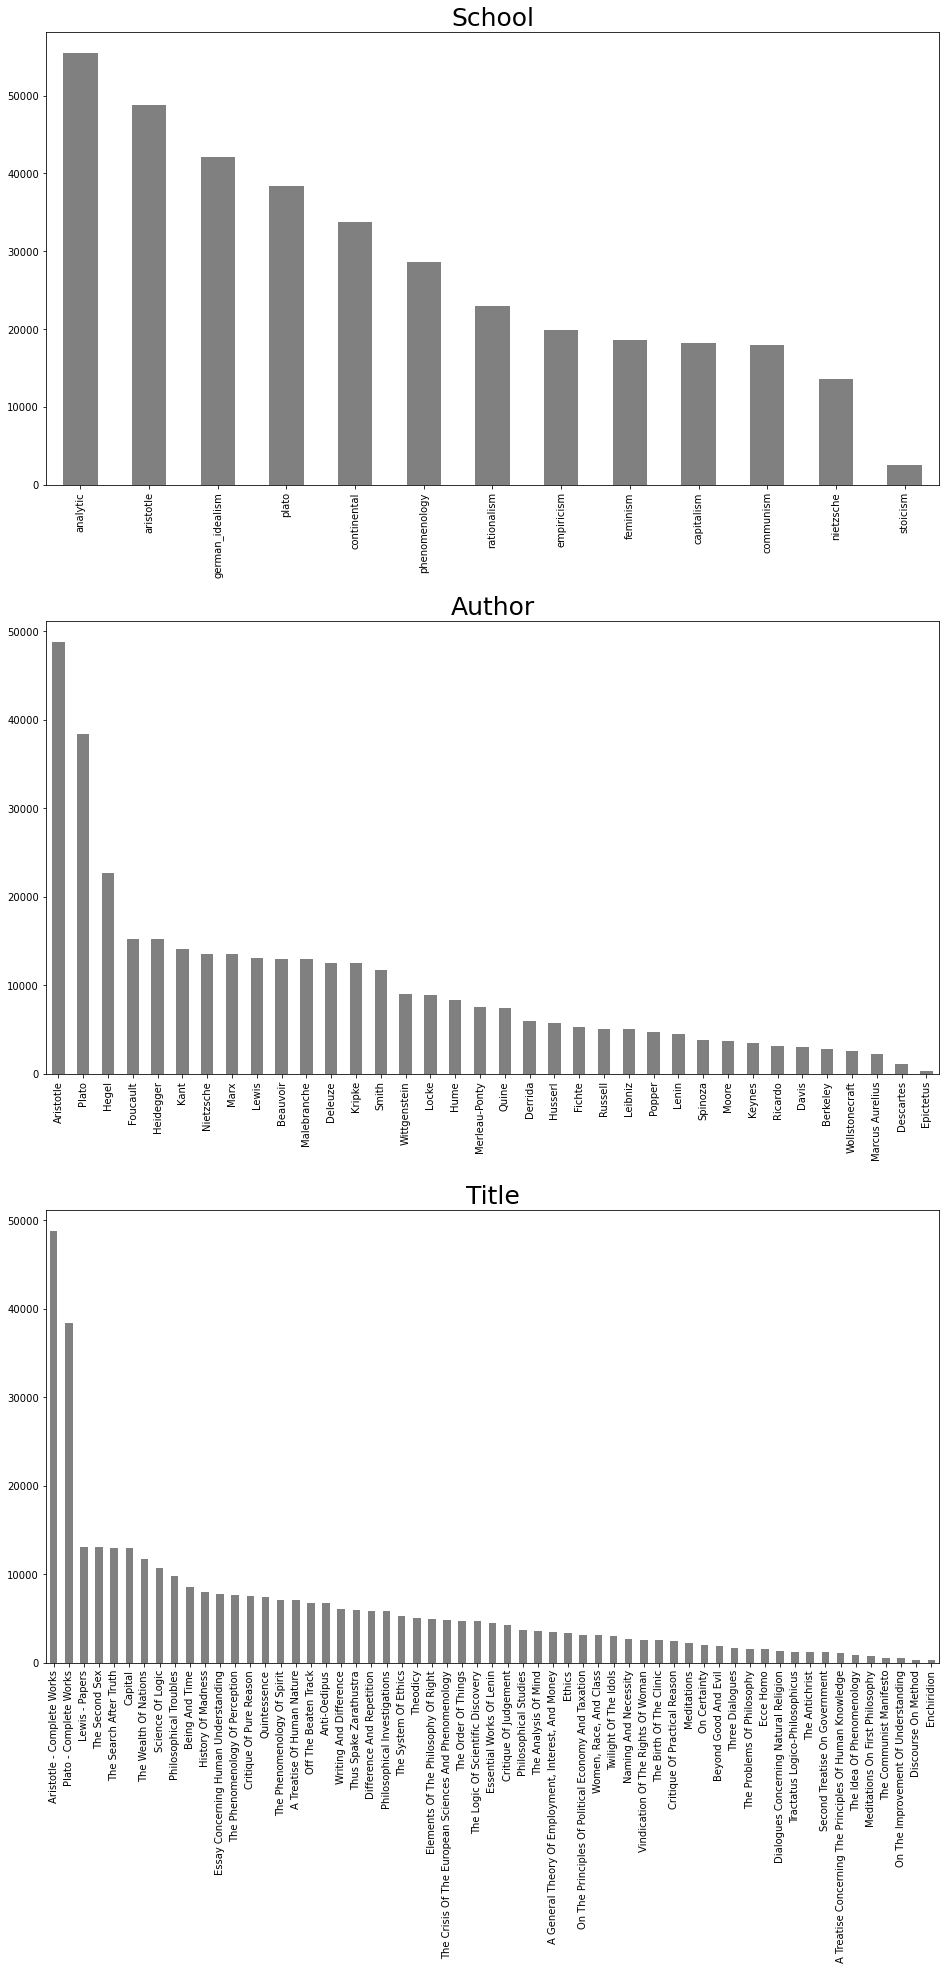

In [6]:
#plot for sentence number in different schools and authors
fig,ax = plt.subplots(3,1,figsize=(16,30))

for i in range(3):
    df[cate_feature[i]].value_counts().plot(kind='bar',ax=ax[i],color="grey")
    ax[i].set_title(cate_feature[i].capitalize(),size=25)
    
plt.subplots_adjust(hspace=0.3)

By barplots, we can find some of the early philosophers are very prolific, such as Aristotle and Plato. They have provided us with a vast philosophical treatise.

Beside, data with different attributions is in similar magnitudes, which gives us a chance to analyze them by some quantitive methods.


### 2.2) Numerical features

After categorical features, here are plots for numerical features: sentence length and number of tokens. Both of them presents the writing habits of philosophers. I will also show it in three data levels:overall, by school and by author.

### 2.2.1) Overall

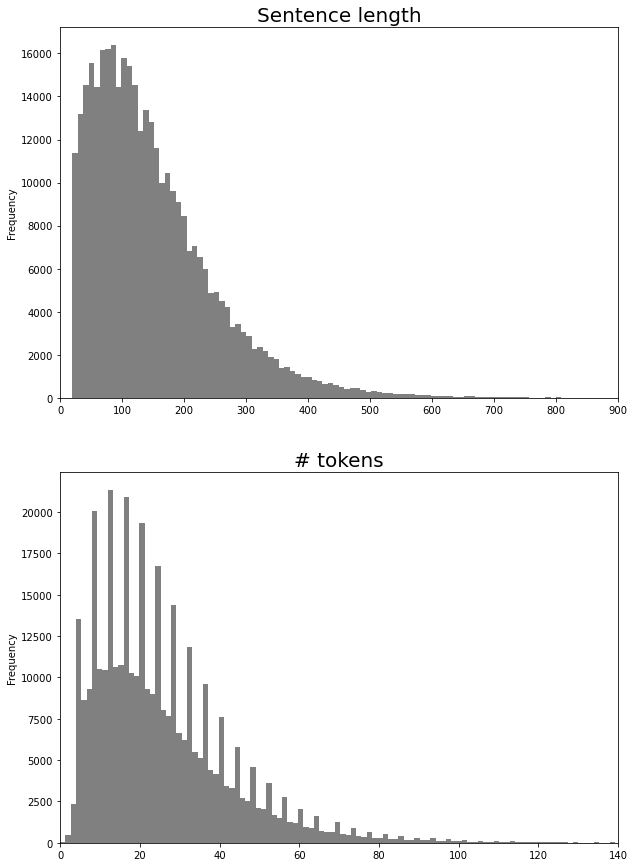

In [7]:
#plot for overall sentence length and number of tokens
fig,ax = plt.subplots(2,1,figsize=(10,15))

ax[0] = df.sentence_length.plot.hist(bins=300,ax=ax[0],color = 'grey')
ax[0].set_title('Sentence length',fontsize=20)
ax[0].set_xlim(0,900);

ax[1] = df.n_tokens.plot.hist(bins=300,ax=ax[1],color = 'grey')
ax[1].set_title('# tokens',fontsize=20)
ax[1].set_xlim(0,140);

### 2.2.2) By school

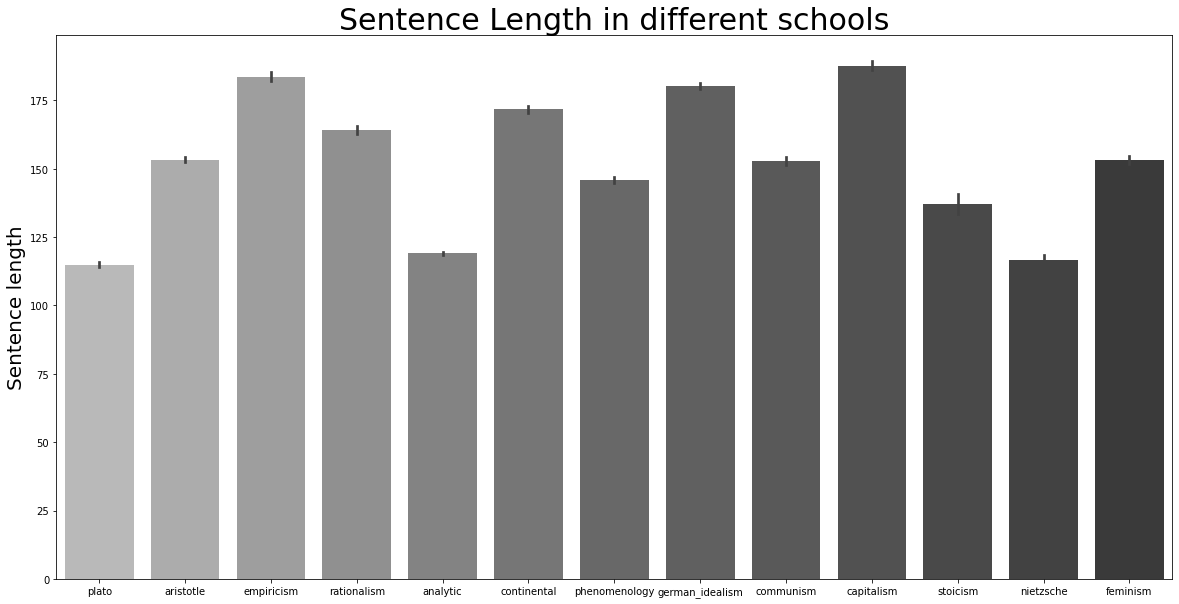

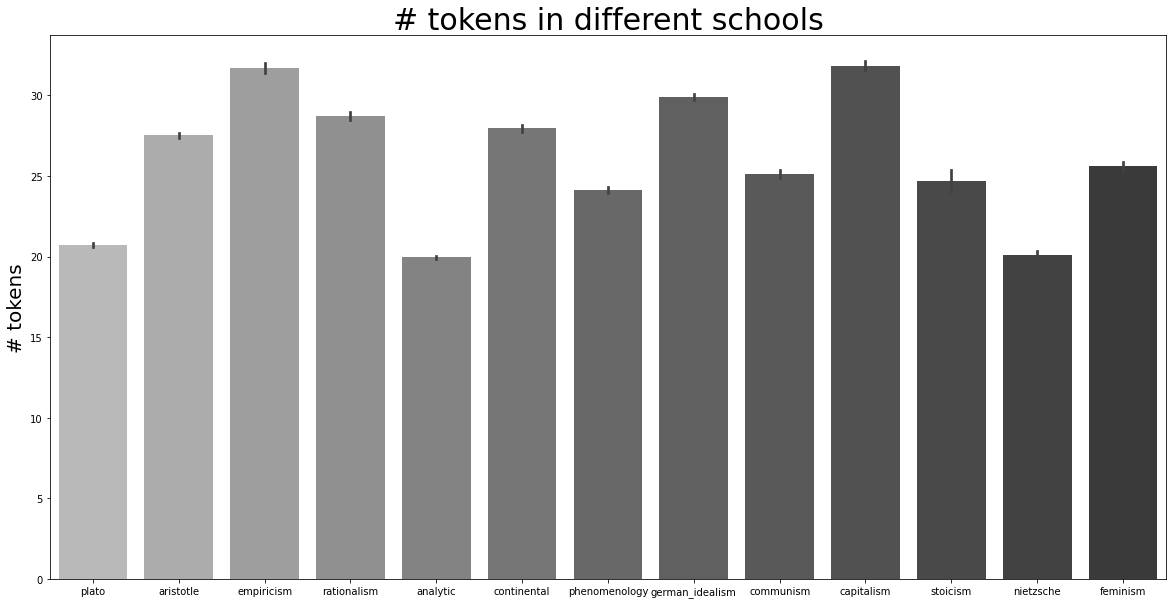

In [8]:
#plot for sentence length in different schools
plt.figure(figsize=(20,10))
sns.barplot(x='school',y='sentence_length',data=df,palette="Greys_d")
plt.title('Sentence Length in different schools',size=30)
plt.ylabel("Sentence length",size=20)
plt.xlabel("")
plt.show()

#plot for number of tokens in different schools
plt.figure(figsize=(20,10))
sns.barplot(x='school',y='n_tokens',data=df,palette="Greys_d")
plt.title('# tokens in different schools',size=30)
plt.ylabel("# tokens",size=20)
plt.xlabel("")
plt.show()

### 2.2.3) By author

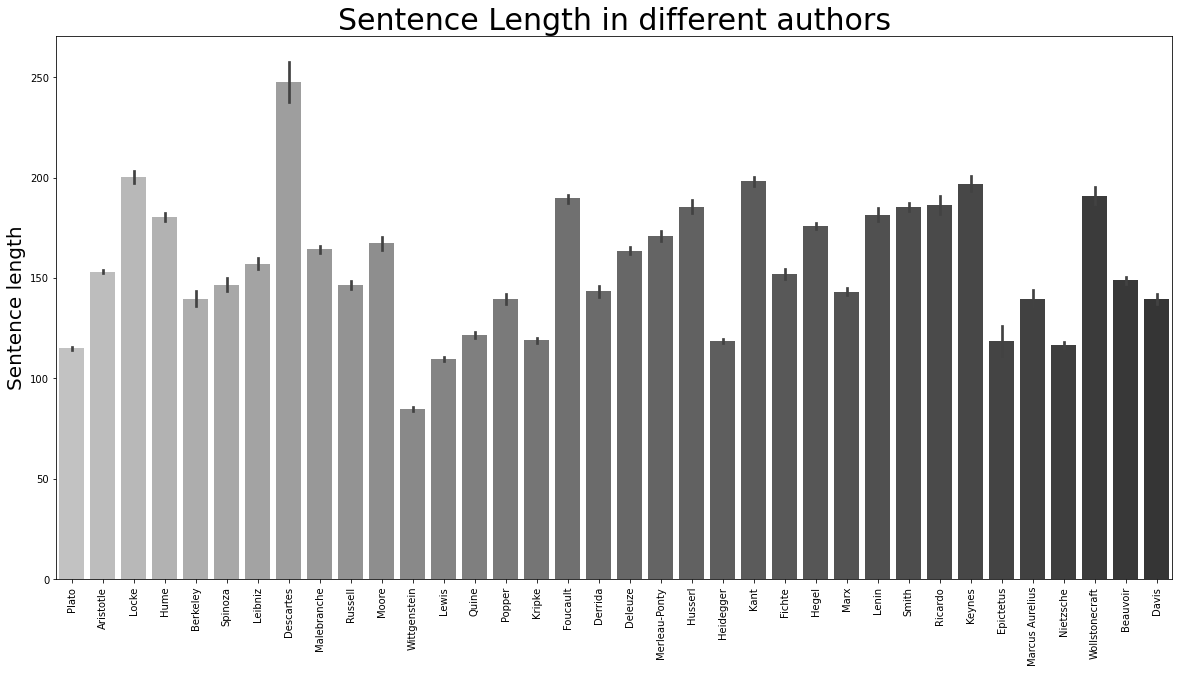

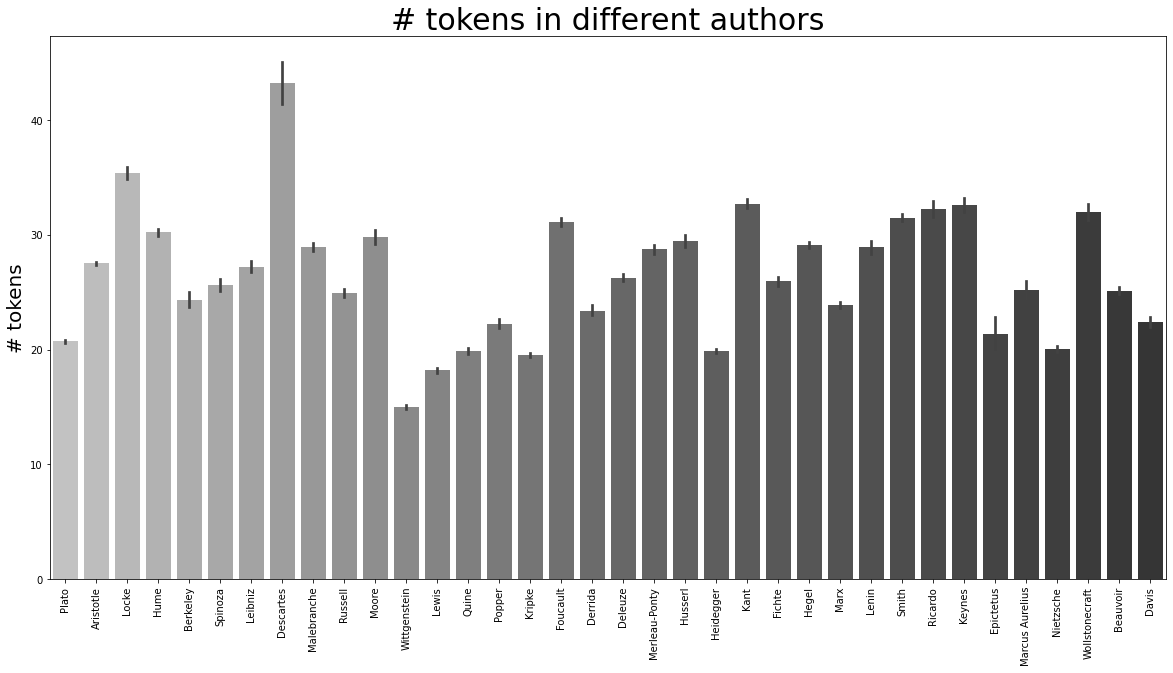

In [9]:
#plot for sentence length in different author
plt.figure(figsize=(20,10))
sns.barplot(x='author', y='sentence_length', data=df , palette="Greys_d")
plt.title('Sentence Length in different authors',size=30)
plt.ylabel("Sentence length",size=20)
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()

#plot for number of tokens in different author
plt.figure(figsize=(20,10))
sns.barplot(x='author', y='n_tokens', data=df , palette="Greys_d")
plt.title('# tokens in different authors',size=30)
plt.ylabel("# tokens",size=20)
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()

Most of the sentences length and number of tokens are in the same magnitude. But even so, we can still find some differences. Descartes prefer use long sentence which Wittgenstein prefer short one, and the former is even twice as long as the latter. So for some philosophy novice, Wittgenstein shoud be easier understanding than descartes.

## 3) What are the different philosophical schools discussing ？

### 3.1) Using wordcloud to find the most frequent words/tokens in different schools.

In [10]:
def wordcloud(school):
    
    #make a wordcloud for a particular philosophy school
    print('School :',school)
    
    stopwords = set(STOPWORDS)
    df_eg = df[df.school==school]
    text = " ".join(sent for sent in df_eg.sentence_lowered)
    
    wordcloud = WordCloud(stopwords=stopwords, max_words=150,
                          width = 600, height = 400,
                          background_color="lightgrey").generate(text)
    
    
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off");

School : plato


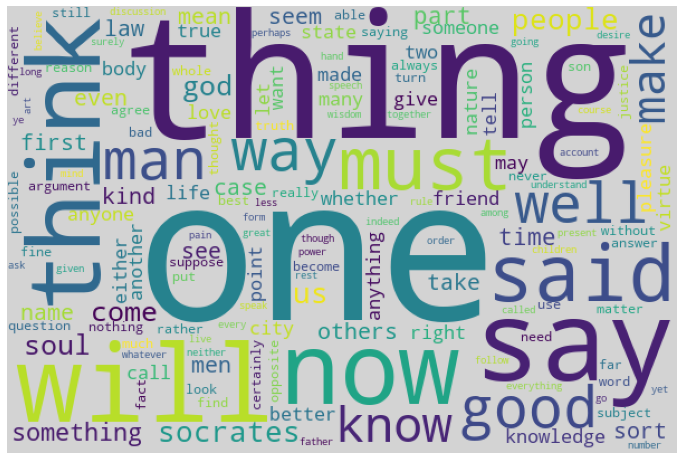

In [11]:
wordcloud('plato')

we can find the most frequent words are not so meaningful,such as one, thing, say, will and etc. This significantly disrupts my data analysis.

What we are really interested in is what these philosophers are studying,thinking and discussing.
Therefore, I will try to use noun only！

### 3.2) Nouns wordcloud by school

In [12]:
def get_noun(df,school):
    
    #function of getting nouns from sentence data
    df_sc = df[df.school==school]
    is_noun = lambda pos: pos[:2] == 'NN'
    text = " ".join(sent for sent in df_sc.sentence_lowered)
    tokenized = nltk.word_tokenize(text)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
    
    return nouns

In [13]:
#define noun list for schools
noun_list = pd.Series([get_noun(df,sc) for sc in school],index=school,
                      name='Example_Series')
noun_list

plato              [socrates, haunts, lyceum, time, king, archon,...
aristotle          [things, name, definition, name, example, man,...
empiricism         [reader, thou, hast, beginning, end, discourse...
rationalism        [essence, existence, nature, existent, thing, ...
analytic           [book, attempt, tendencies, psychology, physic...
continental        [body, defines, right, space, origin, distribu...
phenomenology      [phenomenology, question, century, works, huss...
german_idealism    [critique, critique, reason, reason, paralleli...
communism          [wealth, societies, capitalist, mode, producti...
capitalism         [labour, nation, fund, necessaries, convenienc...
stoicism           [things, power, things, power, power, opinion,...
nietzsche          [book, men, zarathustra, ears, day, tomorrow, ...
feminism           [pleasure, pamphlet, education, volume, dedica...
Name: Example_Series, dtype: object

In [14]:
def noun_wordcould(school):
    
    #function of building wordcould for nouns only
    print('School :',school)
    
    nouns = noun_list[[school]].tolist()[0]
    nouns_str = " ".join(txt for txt in nouns)
    
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, max_words=150,
                          width = 600, height = 400,
                          background_color="lightgrey").generate(nouns_str)
    
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

School : plato


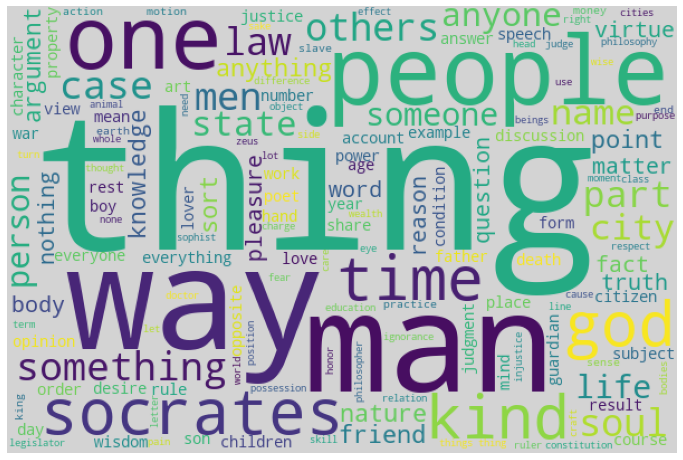

School : aristotle


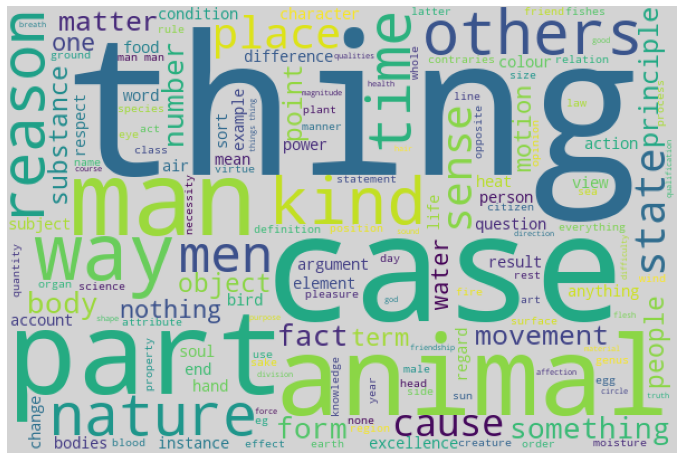

School : empiricism


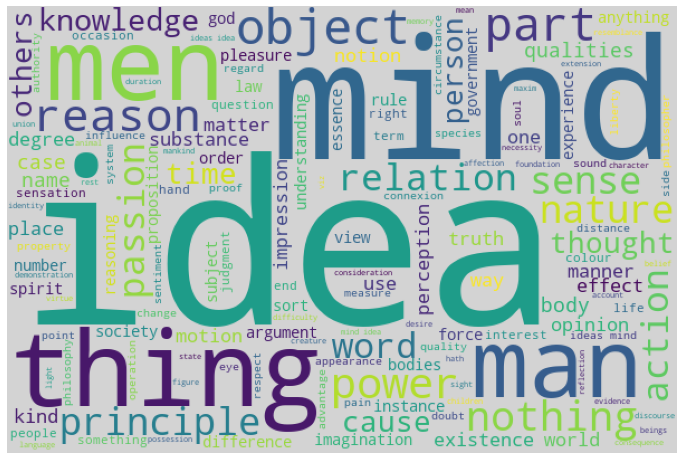

In [15]:
#build new wordcloud by school
for sc in school[:3]:
    noun_wordcould(sc)

In this way, the wordcloud is more clear. Feminism focuses on woman and man,while communism focuses on labour and capital. These result is more close to the truth.

### 3.3) Let's go deep in two examples: Fiminism and Plato

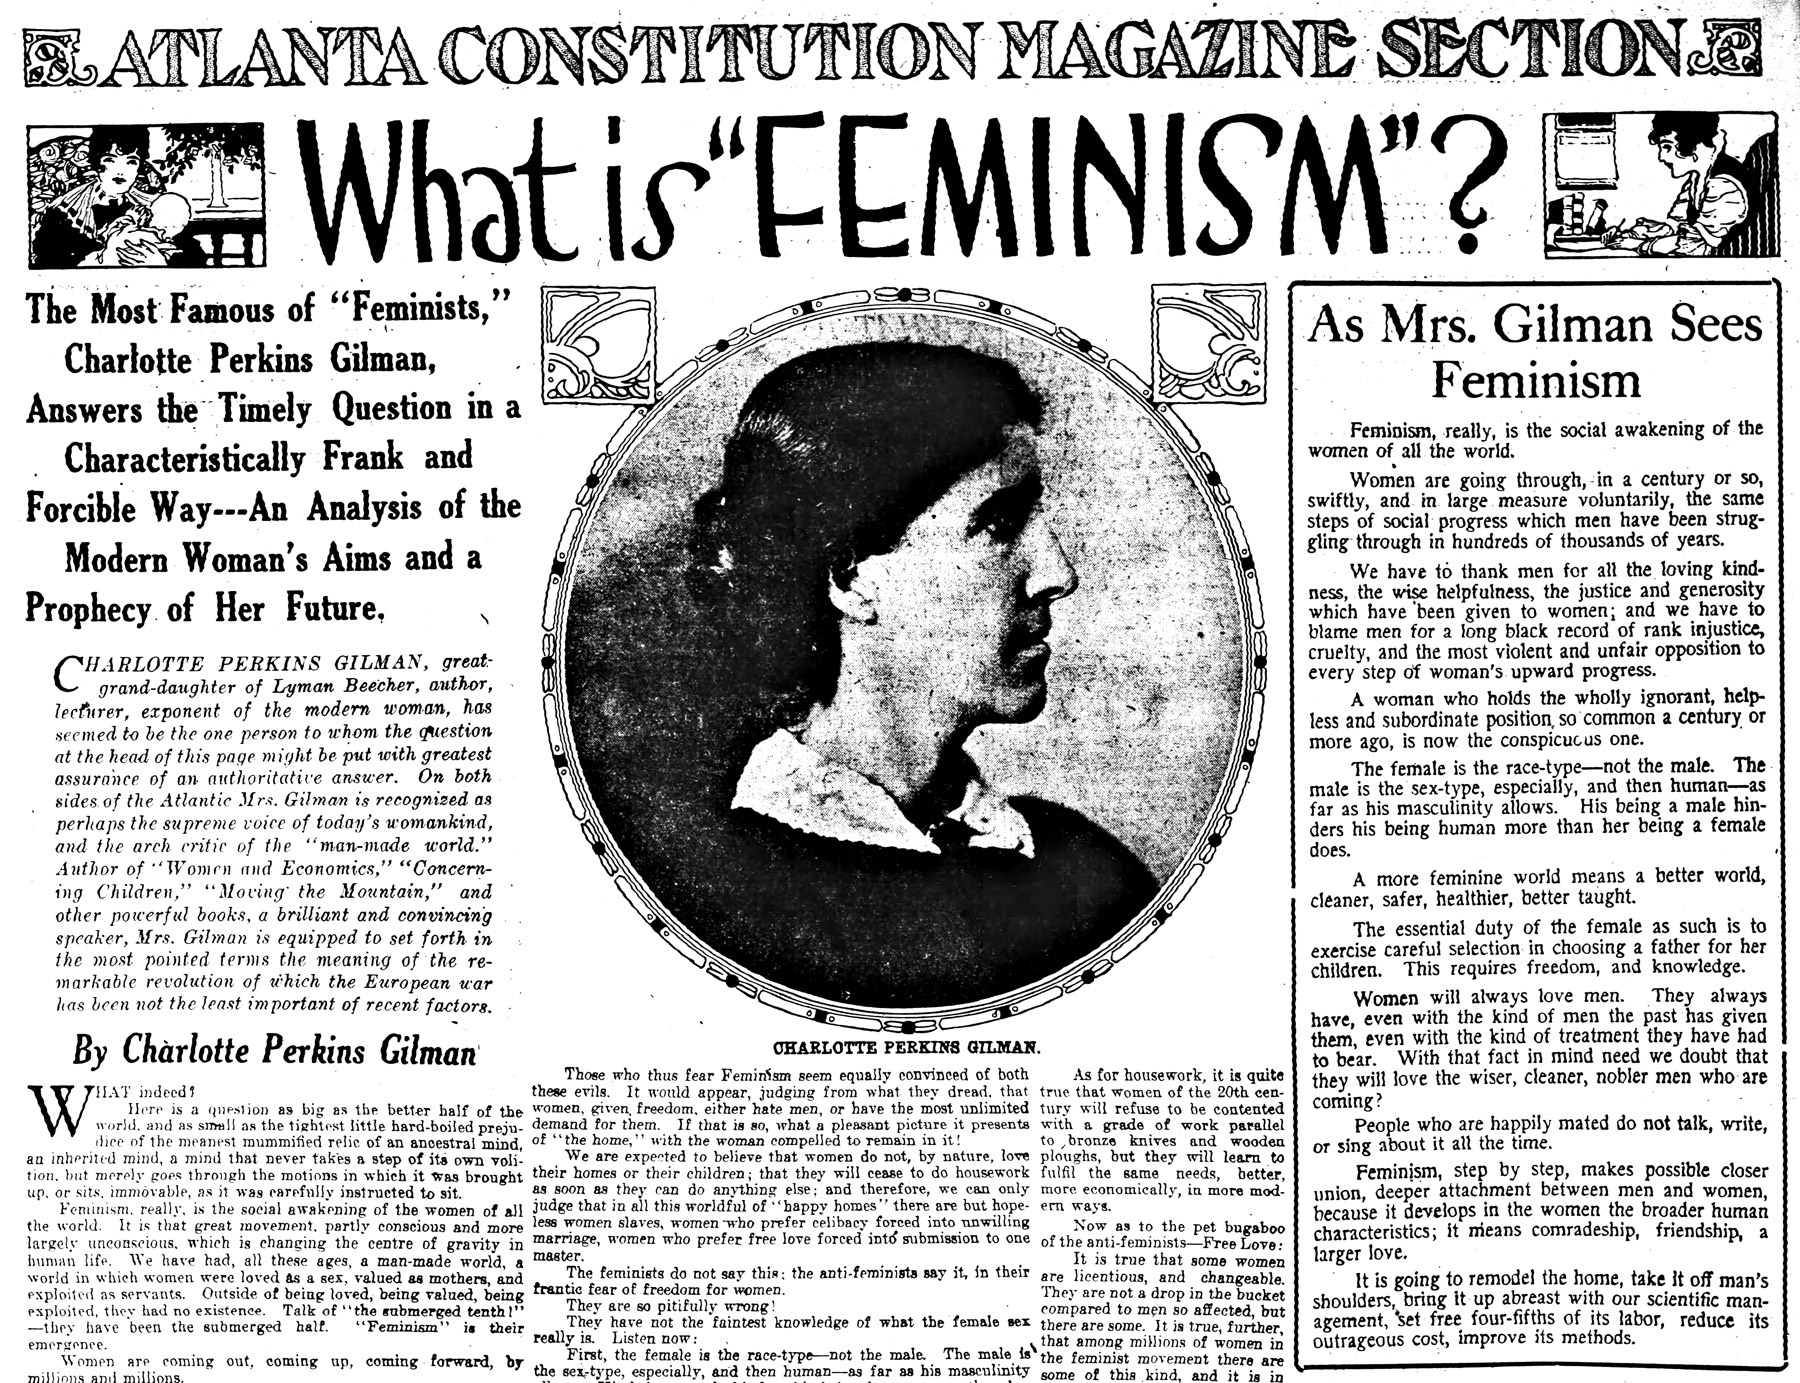

In [16]:
Image("../figs/Feminism.jpg")

School : feminism


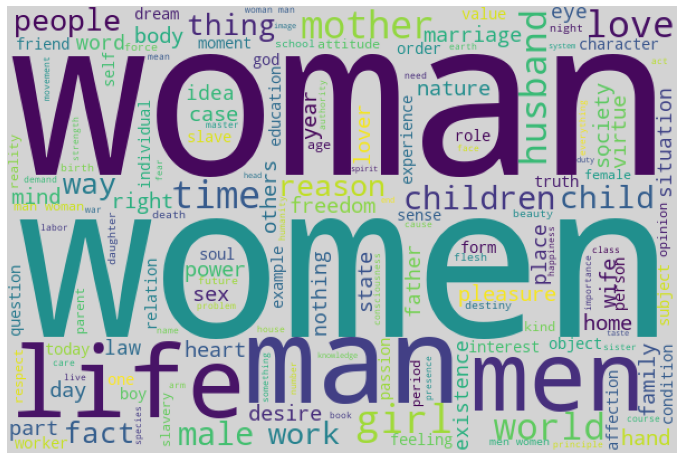

In [17]:
noun_wordcould('feminism')

Feminist theory is the extension of feminism into theoretical, fictional, or philosophical discourse. It aims to understand the nature of gender inequality. It examines women's and men's social roles, experiences, interests, chores, and feminist politics in a variety of fields, such as anthropology and sociology, communication, media studies, psychoanalysis, ecology, home economics, literature, education, and philosophy.

Feminist theory aims to understand gender inequality and focuses on gender politics, power relations, and sexuality. While providing a critique of these social and political relations, much of feminist theory also focuses on the promotion of women's rights and interests. Themes explored in feminist theory include discrimination, stereotyping, objectification (especially sexual objectification), oppression, and patriarchy.
--Wikipedia

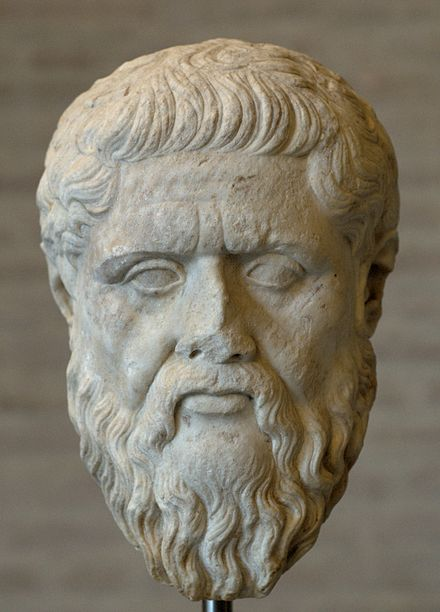

In [18]:
Image("../figs/Plato.jpg")

School : plato


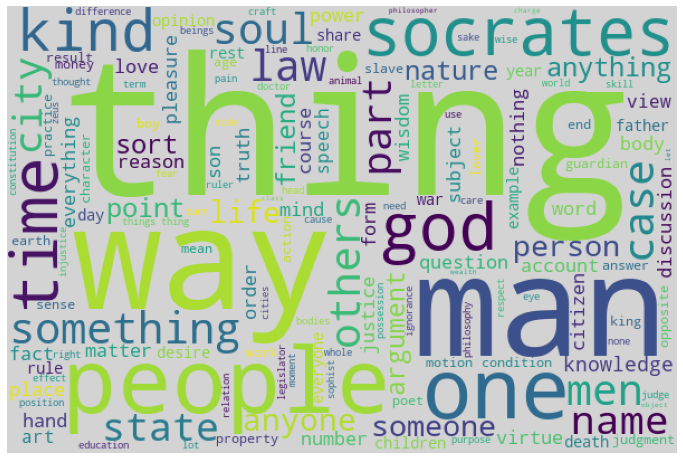

In [19]:
noun_wordcould('plato')

Platonism at least affirms the existence of abstract objects, which are asserted to exist in a third realm distinct from both the sensible external world and from the internal world of consciousness, and is the opposite of nominalism. This can apply to properties, types, propositions, meanings, numbers, sets, truth values, and so on (see abstract object theory). Philosophers who affirm the existence of abstract objects are sometimes called platonists; those who deny their existence are sometimes called nominalists. The terms "platonism" and "nominalism" also have established senses in the history of philosophy. They denote positions that have little to do with the modern notion of an abstract object.
--Wikipedia

## 4) Similarity and Difference among philosophy schools

we also find there are some similarities and differences among these philosophy schools. Such Feminism focus on gender and Plato focus on existence of abstract objects. 
So I hope to explore the relationship between them. I use cosine similarity to compute.

### 4.1) Function Buiding

In [20]:
def build_noun_list(noun1,noun2):
    
    #build two empty dictionaries
    noun1_dict = {} 
    noun2_dict = {} 
    
    #build dictionary for noun1,noun2
    for noun in noun1:
        if noun in noun1_dict:
            num = noun1_dict[noun]
            noun1_dict[noun] = num + 1
        else:
            noun1_dict[noun] = 1
    for noun in noun2:
        if noun in noun2_dict:
            num = noun2_dict[noun]
            noun2_dict[noun] = num + 1
        else:
            noun2_dict[noun] = 1
    
    #convert dictionaries to lists
    nouns_list1 = list(noun1_dict)
    nouns_list2 = list(noun2_dict)
    
    #build a list contain all nouns from noun1 and noun2
    nouns_list = []
    for i in range(len(nouns_list1)):
        nouns_list.append(nouns_list1[i])  
    for i in range(len(nouns_list2)):
        if nouns_list2[i] in nouns_list:
            pass
        else:  
            nouns_list.append(nouns_list2[i])
            
    return nouns_list,noun1_dict,noun2_dict

In [21]:
def build_noun_vec(nouns_list,noun1_dict,noun2_dict):
    
    #build two empty vectors
    nouns_vect1 = []
    nouns_vect2 = []
    
    #fill these vectors in order
    for noun in nouns_list:
        if noun in noun1_dict:
            nouns_vect1.append(noun1_dict[noun])
        else:
            nouns_vect1.append(0)
        if noun in noun2_dict:
            nouns_vect2.append(noun2_dict[noun])
        else:
            nouns_vect2.append(0)
            
    return nouns_vect1,nouns_vect2

In [22]:
def cosine_computation(nouns_vect1,nouns_vect2):
    
    #compute cosine similarity
    sum = 0
    sq1 = 0
    sq2 = 0
    
    for i in range(len(nouns_vect1)):
        sum = sum + nouns_vect1[i] * nouns_vect2[i]
        sq1 = sq1 + pow(nouns_vect1[i], 2)
        sq2 = sq2 + pow(nouns_vect2[i], 2)

    result = round(float(sum) / (math.sqrt(sq1) * math.sqrt(sq2)), 2)
        
    return result

In [23]:
def cosine_similarty(noun1,noun2):
    
    #build nouns list and dictionaries
    result = build_noun_list(noun1,noun2)
    
    #build nouns vectors
    result = build_noun_vec(result[0],result[1],result[2])
    
    #compute cosine similarity
    result = cosine_computation(result[0],result[1])
    
    return result

In [24]:
mat=np.zeros(shape=(13,13))

for i in range(13):
    for j in range(13):
        mat[i][j] = cosine_similarty(noun_list[school[i]],noun_list[school[j]])   

I only want to focus on high correlation.

In [25]:
mat1 = np.zeros(shape=(13,13))
for i in range(13):
    for j in range(13):
        if mat[i][j]>0.6:
            mat1[i][j] = mat[i][j]
        else:
            mat1[i][j]=0

In [26]:
def venn(school1,school2):
    set1 = set(noun_list[school1])
    set2 = set(noun_list[school2])
    both = set1 & set2
    
    def color_func(word, *args, **kwargs):
        if word in both:
            return "black" 
        elif word in set1:
            return "brown" 
        else:
            return "darkblue" 
        
    fig, ax = plt.subplots(figsize=(25, 25))
    fig.suptitle(school1+' vs '+school2, fontsize=25)
    
    sets = [set1,set2]
    out = venn2_wordcloud(sets, wordcloud_kwargs=dict(color_func=color_func), ax=ax)
    out;

### 4.2) Correlation Heatmap

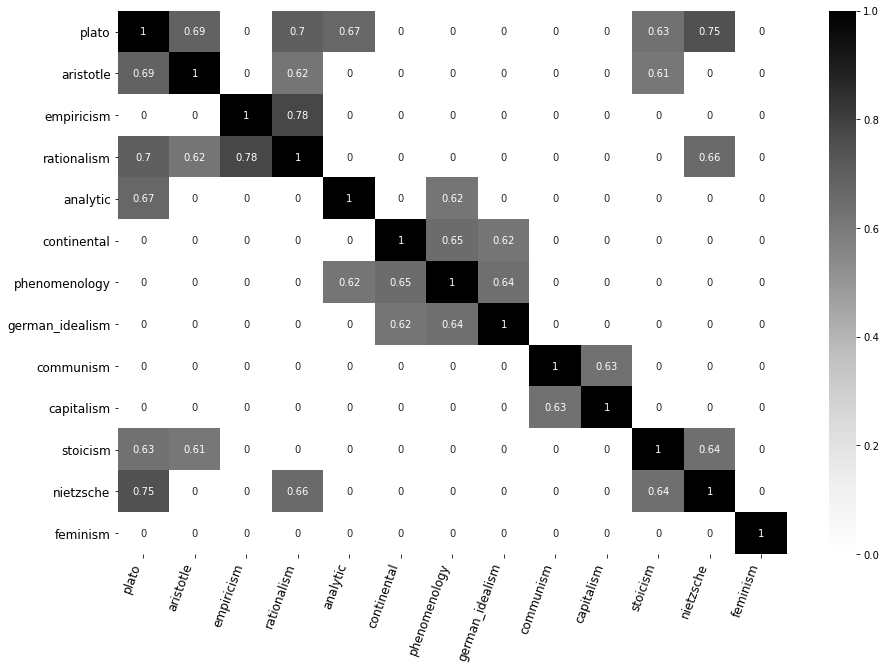

In [27]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(pd.DataFrame(mat1, columns = range(13), index = range(13)), 
                annot=True,cmap="Greys")
ax.set_yticklabels([sc for sc in school], fontsize = 12, 
                   rotation = 0, horizontalalignment='right')
ax.set_xticklabels([sc for sc in school], fontsize = 12, rotation= 70, horizontalalignment='right');

It's easy to find the highest value is from empiricism and rationalism. Another interesting outcome is that communism and capitalism are strongly correlated with each other, but very low correlation with other schools.

#### 4.2.1) Empiricism & Rationalism

Rationalism: In philosophy, rationalism is the epistemological view that "regards reason as the chief source and test of knowledge" or "any view appealing to reason as a source of knowledge or justification". More formally, rationalism is defined as a methodology or a theory "in which the criterion of the truth is not sensory but intellectual and deductive".

Empiricism: Empiricism emphasizes the role of empirical evidence in the formation of ideas, rather than innate ideas or traditions. However, empiricists may argue that traditions (or customs) arise due to relations of previous sense experiences.--Wikipedia

School : empiricism


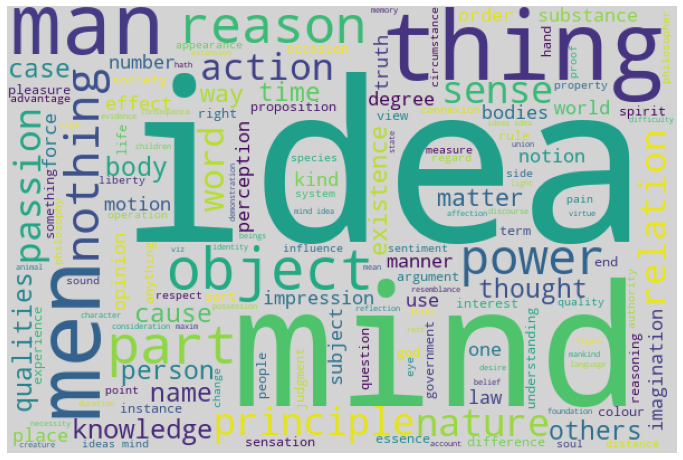

School : rationalism


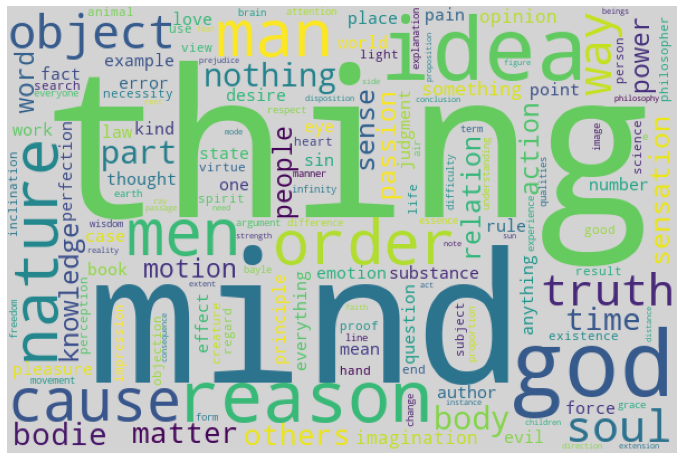

In [28]:
noun_wordcould('empiricism')
noun_wordcould('rationalism')

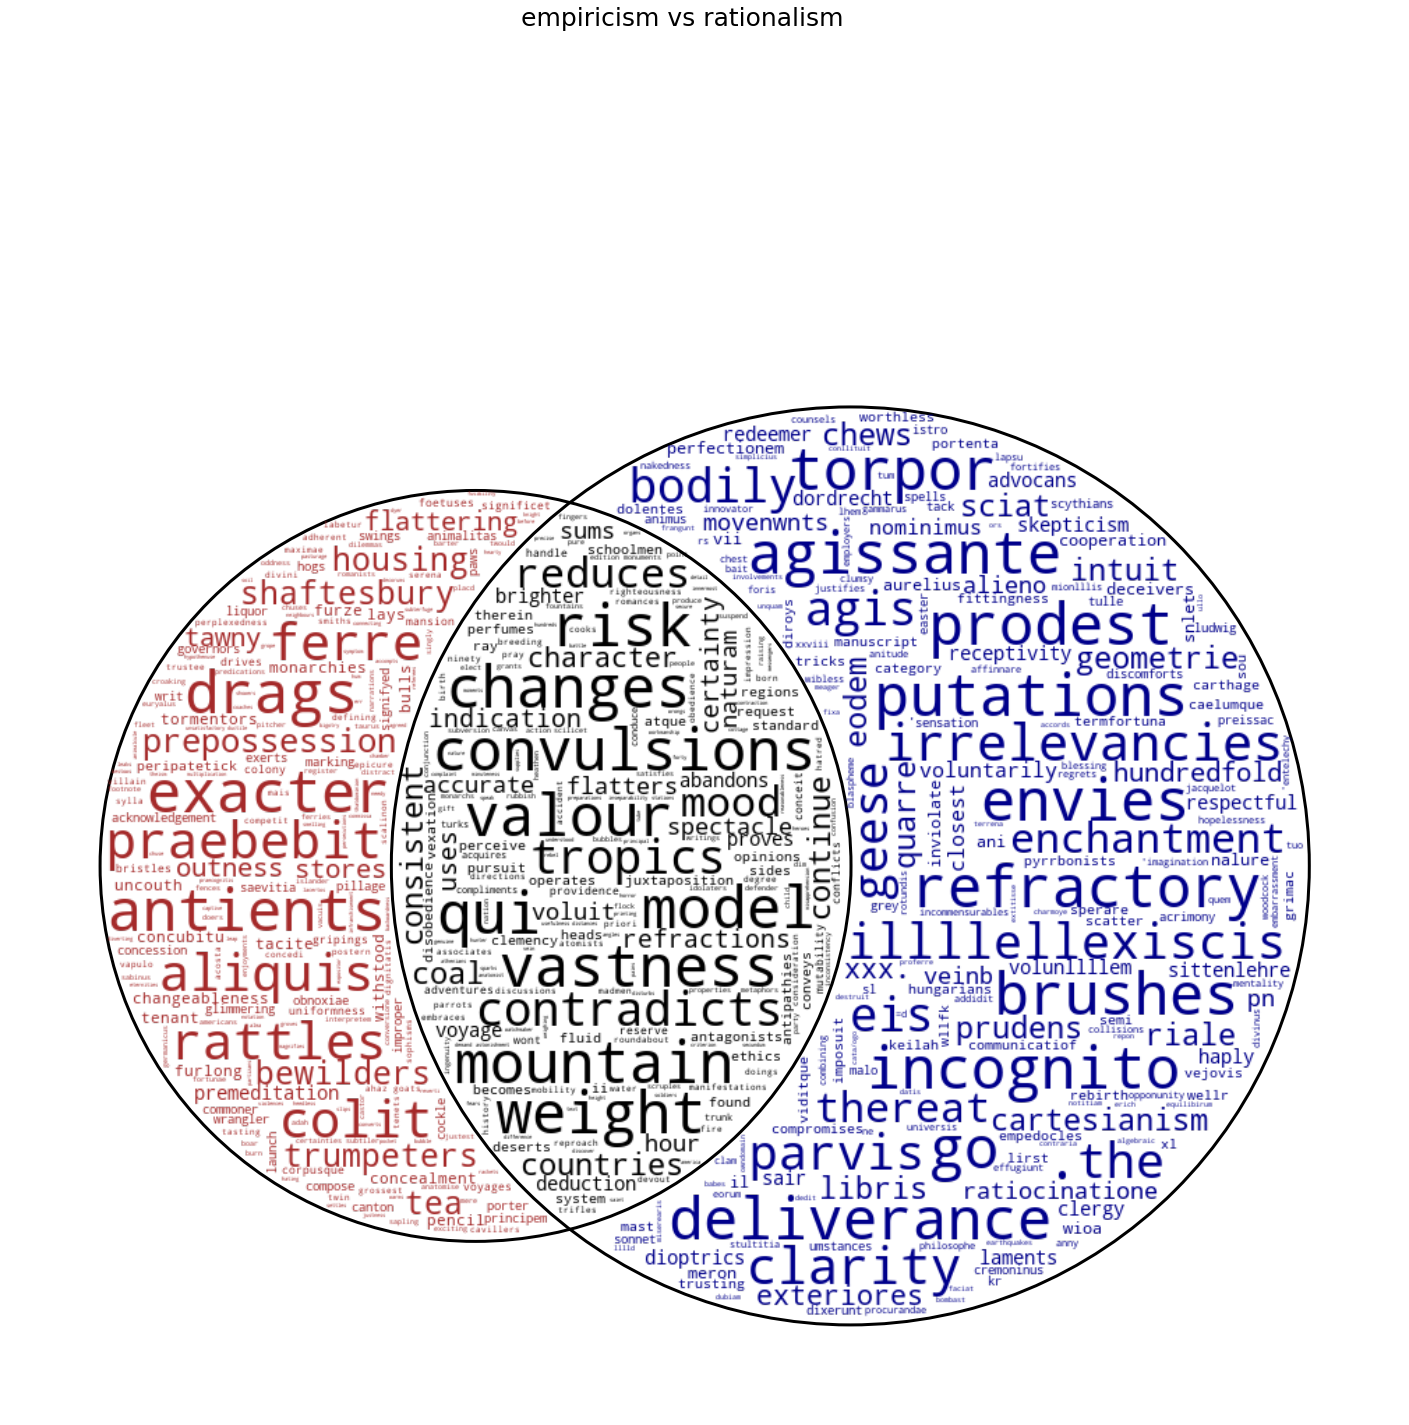

In [29]:
venn('empiricism','rationalism')

Rationalism and empiricism are schools of thought that search for meaning in our existence. Each of these philosophies quest for the truth in our life by promoting skepticism, or a doubt that the other ideas are true. Fundamentally, these two philosophies are essentially opposites.
Philosophers who value rationalism or empiricism maintain a continual discussion over the meaning of our existence by establishing claims that attempt to disprove the beliefs of the other philosophy based on their skepticism of opposing viewpoints. A key similarity between these philosophies is that many philosophers from both schools of thought believe in God; however, God's responsibility in how humans uncover the truth about their existence is fundamentally different.--Joe Ricker

The distinction between rationalism and empiricism was not made by philosophers of the time, but by later generations. In fact, sometimes the distinction between the two is not as significant as it is made out to be. All three major rationalists agreed on the importance of empirical science, and they were closer to Descartes than to Spinoza and Leibniz in their research methods and metaphysical theories. Although such distinctions are necessary in the writing of books, they are not very useful in philosophy itself.

#### 4.2.2) Communism & Capitalism

Communism: Communism is a philosophical, social, political, and economic ideology and movement whose goal is the establishment of a communist society, namely a socioeconomic order structured upon the ideas of common ownership of the means of production and the absence of social classes, money.

Capitalism:  Central characteristics of capitalism include capital accumulation, competitive markets, a price system determined by supply and demand, private property, property rights recognition, voluntary exchange, and wage labor. In a capitalist market economy, decision-making and investments are determined by owners of wealth, property, ability to maneuver capital or production ability in capital and financial markets—whereas prices and the distribution of goods and services are mainly determined by competition in goods and services markets.

School : communism


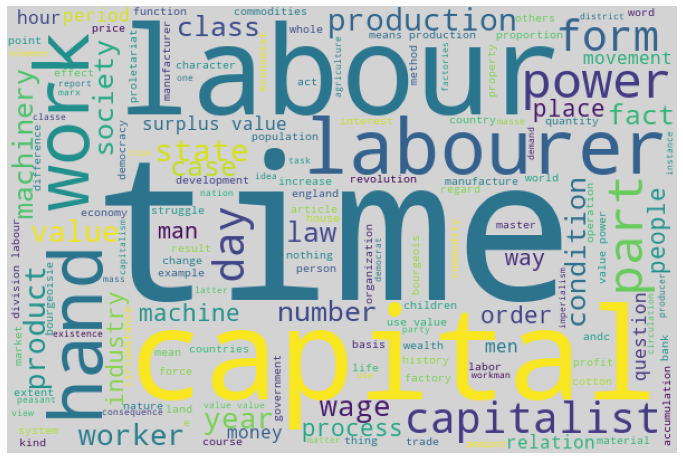

School : capitalism


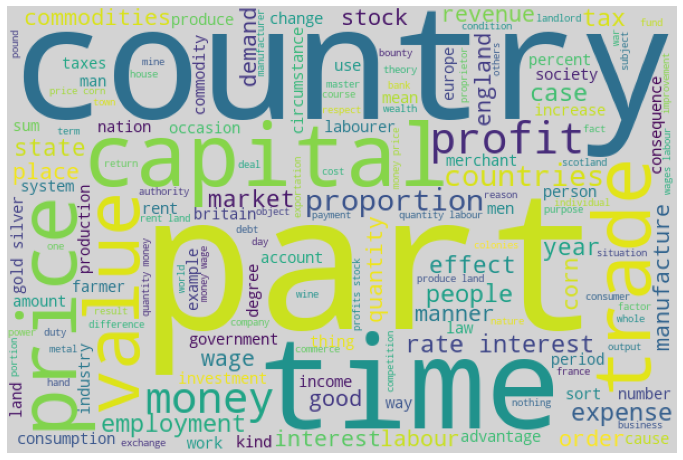

In [30]:
noun_wordcould('communism')
noun_wordcould('capitalism')

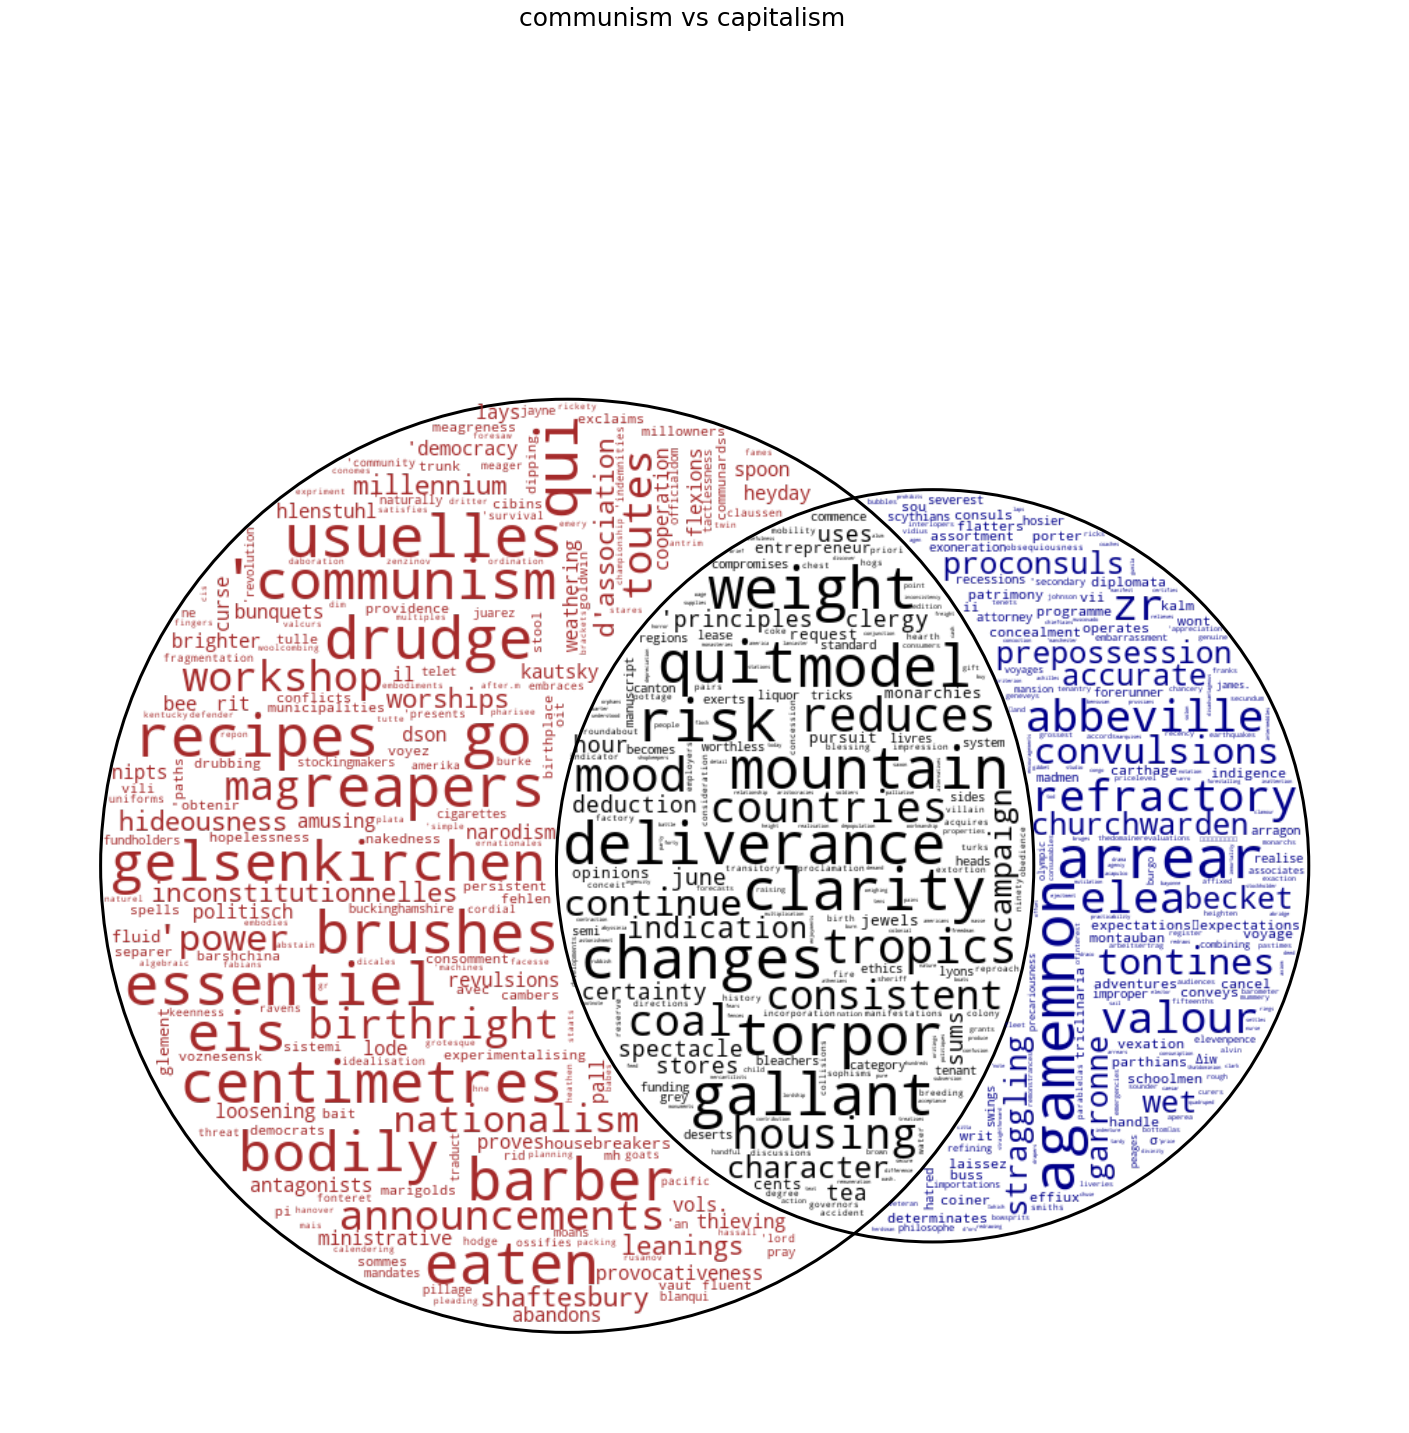

In [31]:
venn('communism','capitalism')

Capitalism and communism are similar in the following areas;

They are both economic systems;
Both economic systems participate in the global market;
They make use of state/private property;
Both systems make use of incredible amounts of violence to eliminate their opposition thereby enforcing their system;
They pursue the same end goal;

The two economic systems are different in the following areas;

Meaning;
Class distinction and equalitarian society;
Freedom of property ownership;
Democratic and non-democratic;
Level of government interference;
Wealth redistribution;
Occupation choice;
Business ownership;

Reference: https://www.jotscroll.com/capitalism-vs-communism-differences-similarities#What-are-the-similarities-and-differences-between-capitalism-and-communism